In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('data Mashable.csv')
df.head(5)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


# How linear regression works

A model that depends on the y(dependend) and x(independed) variabel, to be able to predict. The model is a straight line.

# Pre-processing steps

Make a subset with five variabels from the original dataframe that could help predict the shares.

In [5]:
df_subset = df[["global_subjectivity", "num_imgs", "n_tokens_content","is_weekend","title_subjectivity"]]
df_subset

,global_subjectivity,num_imgs,n_tokens_content,is_weekend,title_subjectivity
0,0.439379,12,821,0,0.666667
1,0.300454,6,489,0,0.000000
2,0.575486,0,131,0,0.000000
3,0.327220,2,556,0,0.000000
4,0.507709,18,880,0,0.000000
...,...,...,...,...,...
24994,0.448753,9,342,0,0.642857
24995,0.418081,1,243,0,0.000000
24996,0.486041,4,1334,1,0.288889
24997,0.627143,1,263,0,0.000000


# Whats the target?

These 5 variables could be facters that determin the amount of shares. 
<p>
    <b>Title</b> is important, thats what attracts people, and <b>images</b> in an article make the article more intressting. If the article is posted on the <b>weekend</b> might help increase the shares, because people are more active and social on the weekend. The <b>global subjectivity</b> might appeall to more people in general. 


# Splitting the dataset into a training and test set

Splitting the dataset so that we can first train the model and then test it. By doing so, we can see if we have the same results. 

<b>test_size</b> = splitting the data into 70% training data and 30% test data

In [6]:
y = df['shares_log'] #We need to take out shares as our Y-variable
X = df_subset #these are the 5 factors that help predict the amount of shares
X.index = df['url'] #the url is like the title/name/id of the variable
X.head() #this is the train set

,global_subjectivity,num_imgs,n_tokens_content,is_weekend,title_subjectivity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0.439379,12,821,0,0.666667
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0.300454,6,489,0,0.000000
http://mashable.com/2013/02/01/hello-kitty-rocket/,0.575486,0,131,0,0.000000
http://mashable.com/2014/02/06/add-us-on-snapchat/,0.327220,2,556,0,0.000000
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0.507709,18,880,0,0.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() # this is the train set

,global_subjectivity,num_imgs,n_tokens_content,is_weekend,title_subjectivity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,0.451711,0,141,1,0.500000
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0.476976,9,392,0,0.100000
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0.488495,1,622,0,0.000000
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0.545746,23,251,0,0.454545
http://mashable.com/2013/08/28/chef-knife-moves-video/,0.507042,13,940,0,0.750000


# Training a linear regression model to predict the number of shares, using the 5 variables

In [8]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [9]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.294769,global_subjectivity
0.003892,num_imgs
-0.000015,n_tokens_content
0.127856,is_weekend
0.037169,title_subjectivity


The highest coefficient is the global subjectivity, this means that that variable has the most correlation on the target.

After training the model, we put the test data in the model.

In [10]:
y_pred = lm.predict(X_test) #generate the predictions
resid = y_pred - y_test #get the residuals by subtracting the prediction from the actual shares

Plots of the residuals

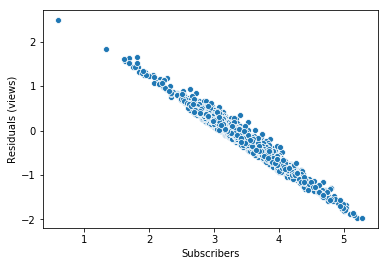

In [11]:
sns.scatterplot(x=y_test,y=resid,data=df)
plt.xlabel('Subscribers')
plt.ylabel('Residuals (views)')
plt.show()

This <i>plot</i> shows that the errors are not that far off. When there are 5 shares, the model added +2 shares, so the models corrects it by subtracting -2 shares.

Now we can <i>plot</i> the predicted shares with the actual shares.

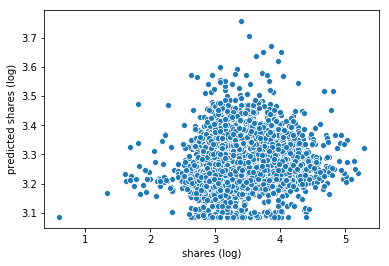

In [12]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('shares (log)')
plt.ylabel('predicted shares (log)')
plt.show()

This <i>plot</i> shows that the predicted shares are not very far of the actual shares. 

sns.lmplot(x=X_test, y=y_test, fit_reg=True, data=df) #fit_reg=False leaves out the regression line; see below
#plt.xlabel('shares log') #use matplotlib to refine Seaborn plot
#plt.ylabel('resid')
#plt.title('title & shares')
plt.show()

In [13]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.025697296641941425

This <b>model</b> has 0.02% accuracy, which is not good. 

In [14]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4007806707933104

The RMSE is 0.40. This means that 0.40 off the predicting.

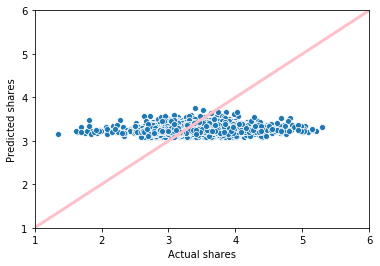

In [22]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim([1,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='pink', lw=3) #Plot a diagonal length
plt.show()

The <b>model</b> doenst work well. Line is not flowing with the predictions. The only bit in the model is correct, the rest 99.89% is off. 